In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('./train_data.csv', delimiter=',', index_col=0)
data.head()

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [6]:
data.shape

(59966, 16)

In [9]:
# check if the data types are all right
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

In [4]:
data.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [5]:
# check if there are any NaNs
pd.isna(data).sum()

ID                              0
HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

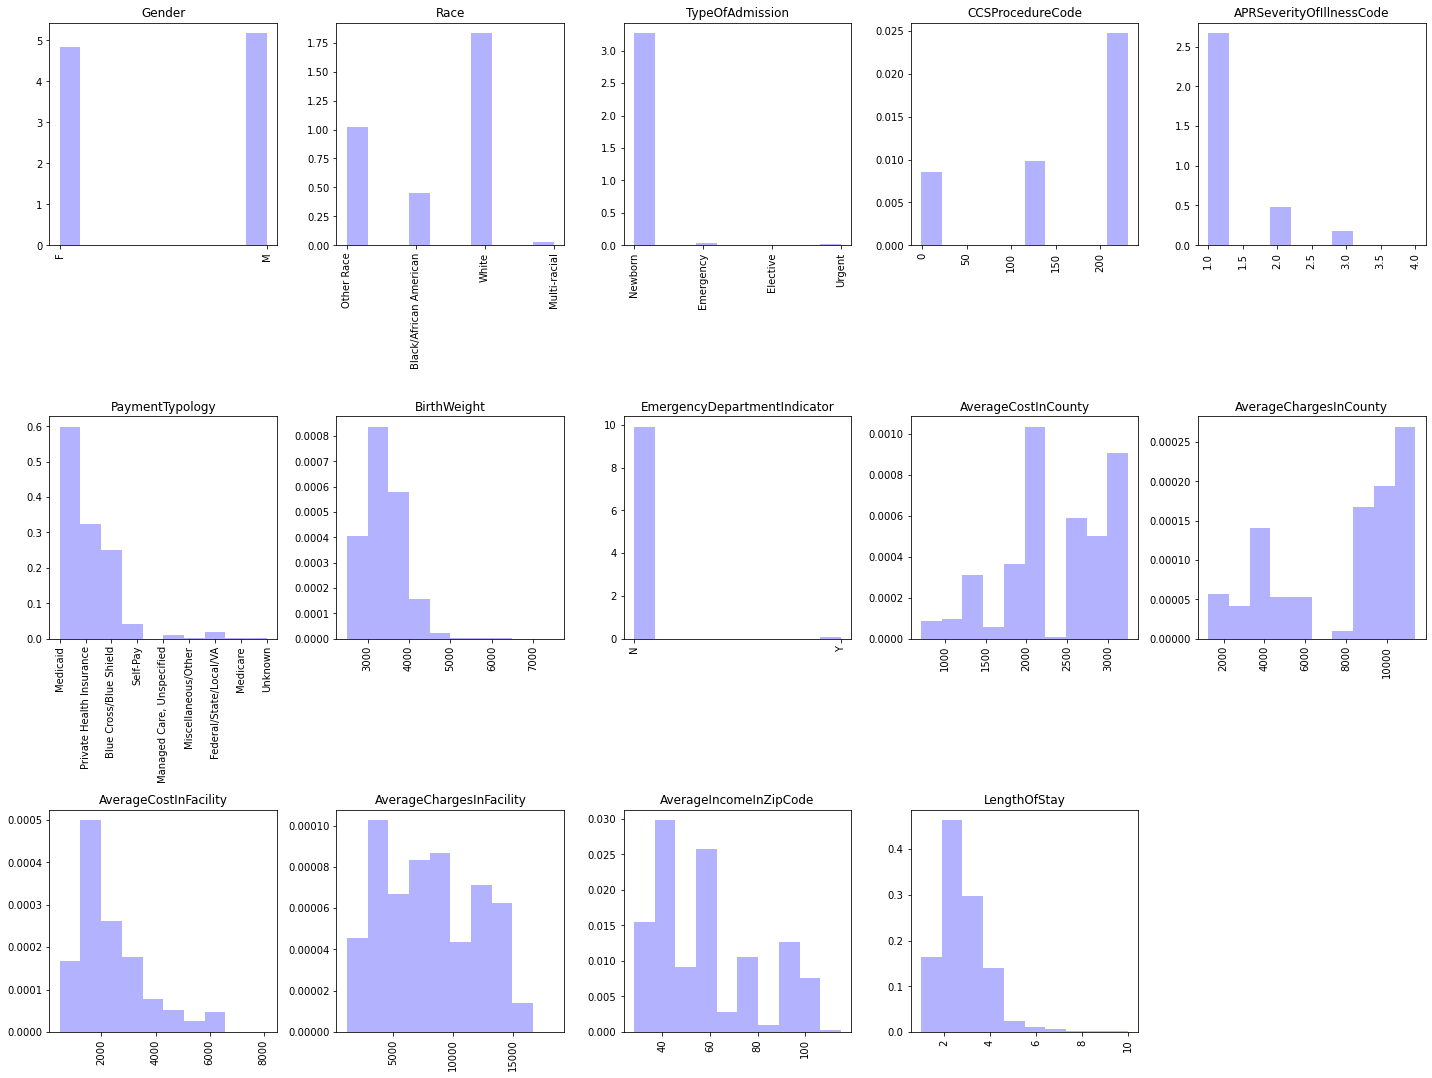

In [78]:
# let's see data distribution

plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

In [85]:
data['Gender'].value_counts()
data[data['Gender']=='U']

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
56745,Long Island,U,White,Newborn,231,2,Medicaid,3200,N,2208,10134,1927,8584,104,4


In [6]:
# The gender column has a anomaly which can be removed because there is only one of it.
data.drop(56745, axis=0, inplace=True)

In [7]:
# HealthServiceArea is not a attribute, so drop it.
data.drop('HealthServiceArea', axis=1, inplace=True)

In [148]:
# Separate majority and minority classes
majority = data[data['LengthOfStay']==0]
minority = data[data['LengthOfStay']==1]
 
# Downsample majority class
majority_downsampled = resample(majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=10070,     # to match minority class
                                 random_state=0) # reproducible results
 
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])
 
# Display new class counts
downsampled['LengthOfStay'].value_counts()

1    10070
0    10070
Name: LengthOfStay, dtype: int64

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

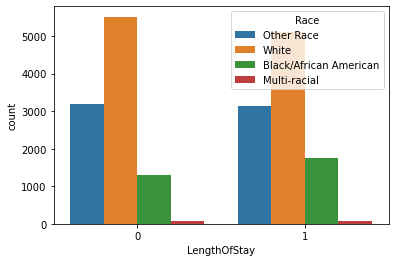

In [125]:
data['Race'].value_counts()

# fig, ax = plt.subplots()
# sns.catplot("Race", hue="LengthOfStay", data=data, kind="count", 
#             palette={0:"blue", 1:"red"}, ax=ax)
# plt.close(2)
# ax.legend(title="Race")
# ax.set_xticklabels(["LengthOfSaty < 4", "LengthOfSaty >= 4"])
# ax.set_xlabel("")
# fig.suptitle("Race vs. LengthOfStay");
sns.countplot(x="LengthOfStay", hue="Race", data=downsampled)

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

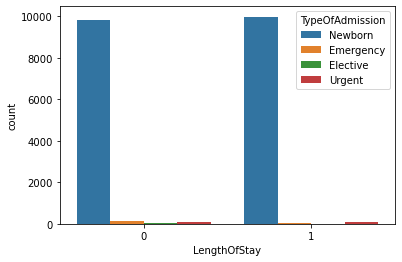

In [126]:
data['TypeOfAdmission'].value_counts()
sns.countplot(x="LengthOfStay", hue="TypeOfAdmission", data=downsampled)

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

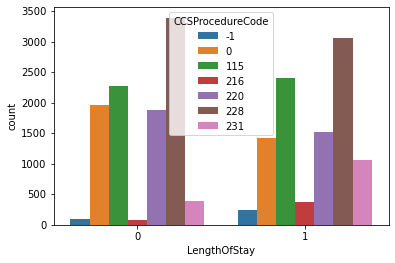

In [127]:
data['CCSProcedureCode'].value_counts()
sns.countplot(x="LengthOfStay", hue="CCSProcedureCode", data=downsampled)

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

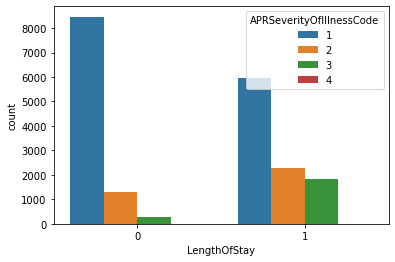

In [128]:
data['APRSeverityOfIllnessCode'].value_counts()
sns.countplot(x="LengthOfStay", hue="APRSeverityOfIllnessCode", data=downsampled)

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

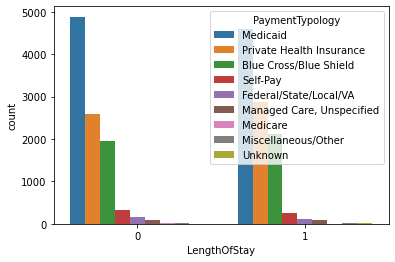

In [129]:
data['PaymentTypology'].value_counts()
sns.countplot(x="LengthOfStay", hue="PaymentTypology", data=downsampled)

<AxesSubplot:xlabel='LengthOfStay', ylabel='count'>

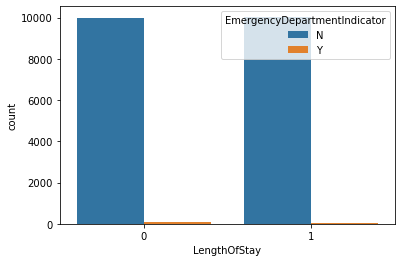

In [130]:
data['EmergencyDepartmentIndicator'].value_counts()
sns.countplot(x="LengthOfStay", hue="EmergencyDepartmentIndicator", data=downsampled)

In [8]:
# seperate target and features.
# features = data.drop('LengthOfStay', axis=1)
target = (data['LengthOfStay'] >= 4).astype(int)
data['LengthOfStay'] = target

data['LengthOfStay'].value_counts()

0    49895
1    10070
Name: LengthOfStay, dtype: int64

<AxesSubplot:ylabel='Frequency'>

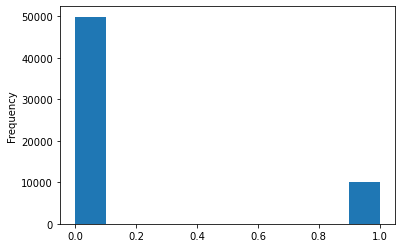

In [14]:
data['LengthOfStay'].plot(kind='hist')

In [12]:
nominal_attributes = ['Gender','Race','TypeOfAdmission','CCSProcedureCode','APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
numerical_attributes = list(set(data.drop('LengthOfStay', axis=1).columns).difference(set(nominal_attributes)))

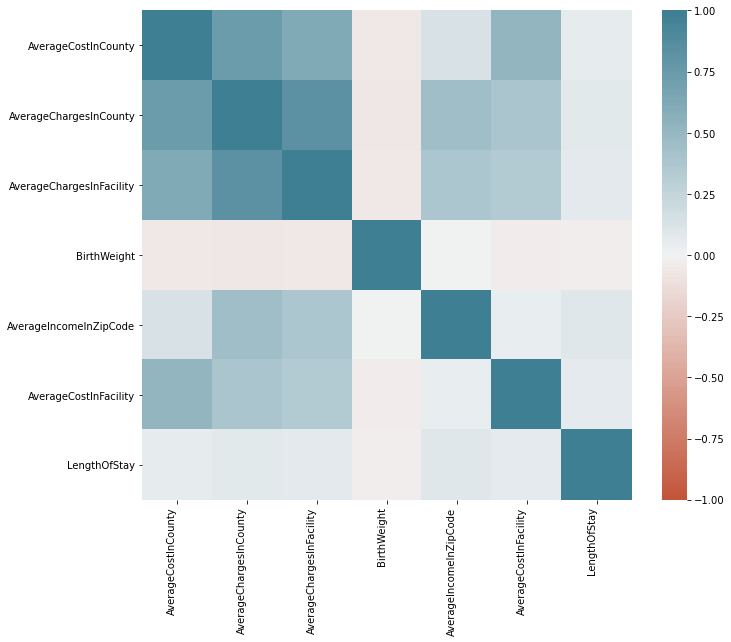

In [44]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data[numerical_attributes + ['LengthOfStay']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

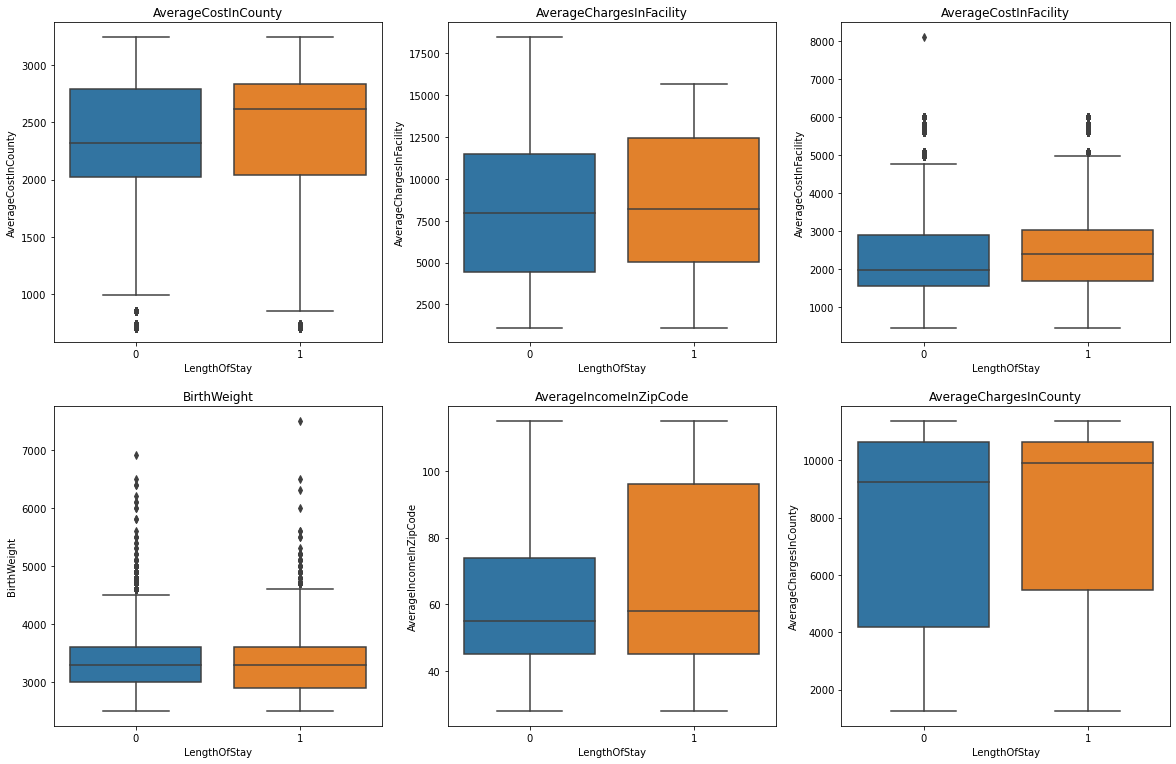

In [99]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_attributes):
    plt.subplot(3,3,i+1)
#     plt.boxplot(features[col])
    ax = sns.boxplot(y=col,x='LengthOfStay',data=data)
    plt.title(col)

The target is categorical, so this notebook tries to use logistic regression to solve it.

In [34]:
# data copy
data_for_logistical_rgression = downsampled.copy()

In [35]:
# data scaling
# transform_attributes = ['AverageCostInFacility', 'AverageIncomeInZipCode']
# powertransformer = PowerTransformer(standardize=False).fit(data_for_logistical_rgression.loc[:, transform_attributes])
# data_for_logistical_rgression.loc[:, transform_attributes] = powertransformer.transform(data_for_logistical_rgression.loc[:, transform_attributes])

minmaxscaler = MinMaxScaler().fit(data_for_logistical_rgression.loc[:, numerical_attributes])
data_for_logistical_rgression.loc[:, numerical_attributes] = minmaxscaler.transform(data_for_logistical_rgression.loc[:, numerical_attributes])

In [36]:
# one hot encoding
OneHotEncoder_logistic_regression = OneHotEncoder()
OneHotEncoder_logistic_regression.fit(data_for_logistical_rgression[nominal_attributes])

onehot_ = OneHotEncoder_logistic_regression.transform(data_for_logistical_rgression[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_logistic_regression.categories_[i])):
        data_for_logistical_rgression[col_name + '_' + str(OneHotEncoder_logistic_regression.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

data_for_logistical_rgression.drop(nominal_attributes, inplace=True, axis=1)

In [37]:
# split 60/20/20
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_logistical_rgression = train_test_split(data_for_logistical_rgression, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_logistical_rgression, val_data_logistical_rgression = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

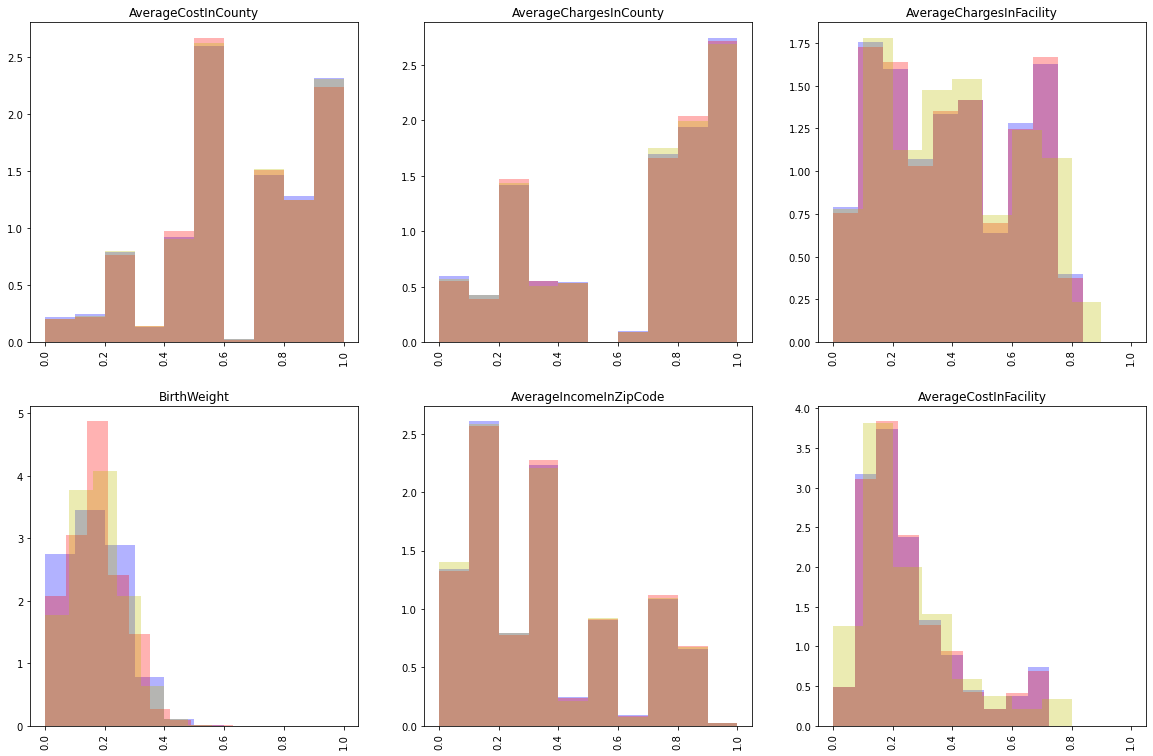

In [200]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_attributes):
    plt.subplot(3,3,i+1)
    plt.hist(train_data_logistical_rgression[col], alpha=0.3, color='b', density=True)
    plt.hist(test_data_logistical_rgression[col], alpha=0.3, color='r', density=True)
    plt.hist(val_data_logistical_rgression[col], alpha=0.3, color='y', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      2005
           1       0.68      0.58      0.63      2023

    accuracy                           0.65      4028
   macro avg       0.66      0.65      0.65      4028
weighted avg       0.66      0.65      0.65      4028

Train F1-Score score: 0.633
Validation F1-Score score: 0.616


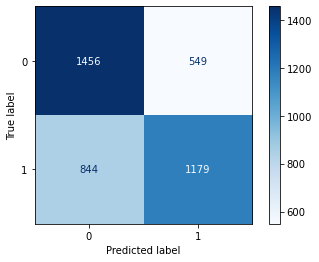

In [39]:
train_x = train_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
train_y = train_data_logistical_rgression[['LengthOfStay']].to_numpy()
val_x = val_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
val_y = val_data_logistical_rgression[['LengthOfStay']].to_numpy()
test_x = test_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
test_y = test_data_logistical_rgression[['LengthOfStay']].to_numpy()

# poly = PolynomialFeatures(3)
# poly.fit(train_x)
# train_x = poly.transform(train_x)
# test_x = poly.transform(test_x)
# val_x = poly.transform(val_x)

# scaler = MinMaxScaler()
# scaler.fit(train_x)
# train_x = scaler.transform(train_x)
# val_x = scaler.transform(val_x)
# test_x = scaler.transform(test_x)

# lambda_paras = np.logspace(-5, 1, num=25)
# train_performace = list()
# valid_performace = list()

# for lambda_para in lambda_paras:
#     clf = LogisticRegression(random_state=0, penalty='l2', C = 1.0/lambda_para, solver='saga', 
#                          max_iter=1000, 
#                          class_weight={0: 1, 1: 5}).fit(train_x, train_y.ravel())

#     train_prediction = clf.predict(train_x)
#     val_prediction = clf.predict(val_x)
#     test_pred = clf.predict(test_x)
    
#     train_f1 = f1_score(train_y, train_prediction)
#     val_f1 = f1_score(val_y, val_prediction)
    
#     train_performace.append(train_f1)
#     valid_performace.append(val_f1)

# plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
#          [tp for tp in train_performace], 'r-')
# plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
#          [vp for vp in valid_performace], 'b--')
# plt.xscale("log")
# plt.ylabel('F1 Score')
# plt.xlabel('Model Capacity')
# plt.legend(['Training','Validation'])
# plt.show()

clf = LogisticRegression(random_state=0, penalty='l2', C = 0.1, solver='saga', 
                         max_iter=1000, 
                         class_weight={0: 1, 1: 1}).fit(train_x, train_y.ravel())

train_prediction = clf.predict(train_x)
val_prediction = clf.predict(val_x)
test_pred = clf.predict(test_x)
    
print(classification_report(test_y, test_pred,))
    
train_f1 = f1_score(train_y, train_prediction)
val_f1 = f1_score(val_y, val_prediction)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))

disp = plot_confusion_matrix(clf, test_x, test_y, cmap=plt.cm.Blues)
plt.show()

Using decision tree to solve this problem

In [149]:
# data copy
data_for_decision_tree = downsampled.copy()
# data_for_decision_tree = data.copy()

In [61]:
# transform_attributes = ['AverageCostInFacility', 'AverageIncomeInZipCode']
# powertransformer = PowerTransformer(standardize=False).fit(data_for_decision_tree.loc[:, transform_attributes])
# data_for_decision_tree.loc[:, transform_attributes] = powertransformer.transform(data_for_decision_tree.loc[:, transform_attributes])

In [150]:
# one hot encoding
OneHotEncoder_decision_tree = OneHotEncoder()
OneHotEncoder_decision_tree.fit(data_for_decision_tree[nominal_attributes])

onehot_ = OneHotEncoder_decision_tree.transform(data_for_decision_tree[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_decision_tree.categories_[i])):
        data_for_decision_tree[col_name + '_' + str(OneHotEncoder_decision_tree.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

data_for_decision_tree.drop(nominal_attributes, inplace=True, axis=1)

In [137]:
# split 60/20/20
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_decision_tree = train_test_split(data_for_decision_tree, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_decision_tree, val_data_decision_tree = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

In [151]:
train_data_decision_tree['LengthOfStay'].value_counts()

0    29966
1     6013
Name: LengthOfStay, dtype: int64

In [117]:
# Separate majority and minority classes
majority = train_data_decision_tree[train_data_decision_tree['LengthOfStay']==0]
minority = train_data_decision_tree[train_data_decision_tree['LengthOfStay']==1]
 
# Downsample majority class
majority_downsampled = resample(majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=0) # reproducible results
 
# Combine minority class with downsampled majority class
train_data_decision_tree = pd.concat([majority_downsampled, minority])
 
# Display new class counts
train_data_decision_tree['LengthOfStay'].value_counts()

0    20000
1     6013
Name: LengthOfStay, dtype: int64

Train Accuracy score: 0.710
Validation Accuracy score: 0.696
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      9921
           1       0.33      0.67      0.44      2072

    accuracy                           0.71     11993
   macro avg       0.62      0.69      0.62     11993
weighted avg       0.81      0.71      0.74     11993

Train F1-Score score: 0.454
Validation F1-Score score: 0.436


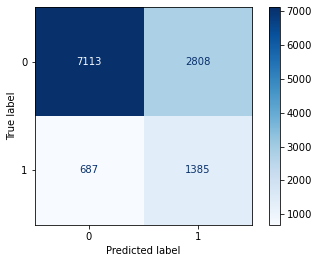

In [141]:
train_decision_tree_x = train_data_decision_tree.drop('LengthOfStay', axis=1)
train_decision_tree_y = train_data_decision_tree['LengthOfStay']
val_decision_tree_x = val_data_decision_tree.drop('LengthOfStay', axis=1)
val_decision_tree_y = val_data_decision_tree['LengthOfStay']
test_decision_tree_x = test_data_decision_tree.drop('LengthOfStay', axis=1)
test_decision_tree_y = test_data_decision_tree['LengthOfStay']

# max_depths = [2,4,5,8,9,10,11,13,15]

# train_hold = list()
# val_hold = list()

# for max_depth in max_depths:
#     clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
#     clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y)
    
#     train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
#     val_decision_tree_prediction = clf_decision_tree.predict(val_decision_tree_x)

#     train_decision_tree_acc = balanced_accuracy_score(train_decision_tree_y, train_decision_tree_prediction)
#     val_decision_tree_acc = balanced_accuracy_score(val_decision_tree_y, val_decision_tree_prediction)
    
#     train_hold.append(train_decision_tree_acc)
#     val_hold.append(val_decision_tree_acc)
    
# plt.plot(max_depths, train_hold, 'r--')
# plt.plot(max_depths, val_hold, 'b-')
# plt.legend(['Train Acc','Val Acc'])
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy')
# plt.show()

clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight={0: 1, 1: 1})
clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y)

train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
val_decision_tree_prediction = clf_decision_tree.predict(val_decision_tree_x)
test_decision_tree_prediction = clf_decision_tree.predict(test_decision_tree_x)

train_decision_tree_acc = balanced_accuracy_score(train_decision_tree_y, train_decision_tree_prediction)
val_decision_tree_acc = balanced_accuracy_score(val_decision_tree_y, val_decision_tree_prediction)

print("Train Accuracy score: {:.3f}".format(train_decision_tree_acc))
print("Validation Accuracy score: {:.3f}".format(val_decision_tree_acc))

print(classification_report(test_decision_tree_y, test_decision_tree_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
val_decision_tree_f1 = f1_score(val_decision_tree_y, val_decision_tree_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Validation F1-Score score: {:.3f}".format(val_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

In [152]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score)

train_decision_tree_x = data_for_decision_tree.drop('LengthOfStay', axis=1)
train_decision_tree_y = data_for_decision_tree['LengthOfStay']

clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight={0: 1, 1: 1})
clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y)

scores = cross_validate(clf_decision_tree, train_decision_tree_x, train_decision_tree_y, 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=10)
scores

{'fit_time': array([0.0592041 , 0.05848908, 0.0589323 , 0.05832553, 0.0581243 ,
        0.05789781, 0.05972195, 0.05916691, 0.05819082, 0.05757403]),
 'score_time': array([0.00476933, 0.00514245, 0.00516033, 0.00518346, 0.00507808,
        0.00510192, 0.00506854, 0.0049262 , 0.00484467, 0.00515914]),
 'estimator': [DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                         max_depth=8),
  DecisionTre

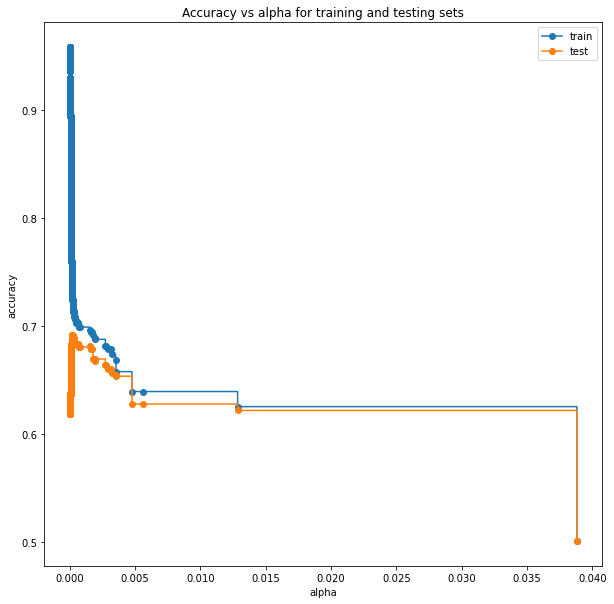

In [41]:
clf_decision_tree = tree.DecisionTreeClassifier(random_state=0)
path = clf_decision_tree.cost_complexity_pruning_path(train_decision_tree_x, train_decision_tree_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_decision_tree_x, train_decision_tree_y)
    clfs.append(clf)

train_scores = [clf.score(train_decision_tree_x, train_decision_tree_y) for clf in clfs]
test_scores = [clf.score(val_decision_tree_x, val_decision_tree_y) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
ccp_alphas[test_scores.index(max(test_scores))]

0.00020274743462429662

Train Accuracy score: 0.572
Validation Accuracy score: 0.558
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      9921
           1       0.64      0.13      0.21      2072

    accuracy                           0.84     11993
   macro avg       0.74      0.56      0.56     11993
weighted avg       0.81      0.84      0.79     11993

Train F1-Score score: 0.255
Validation F1-Score score: 0.216


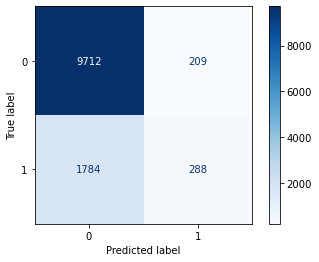

In [139]:
clf_random_forest = RandomForestClassifier(max_depth=8, random_state=0)
clf_random_forest.fit(train_decision_tree_x, train_decision_tree_y)

train_random_forest_prediction = clf_random_forest.predict(train_decision_tree_x)
val_random_forest_prediction = clf_random_forest.predict(val_decision_tree_x)
test_random_forest_prediction = clf_random_forest.predict(test_decision_tree_x)

train_random_forest_acc = balanced_accuracy_score(train_decision_tree_y, train_random_forest_prediction)
val_random_forest_acc = balanced_accuracy_score(val_decision_tree_y, val_random_forest_prediction)

print("Train Accuracy score: {:.3f}".format(train_random_forest_acc))
print("Validation Accuracy score: {:.3f}".format(val_random_forest_acc))

print(classification_report(test_decision_tree_y, test_random_forest_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_random_forest_prediction)
val_decision_tree_f1 = f1_score(val_decision_tree_y, val_random_forest_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Validation F1-Score score: {:.3f}".format(val_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()